# Лабораторная работа №6. Регрессия. Выполнил: Лабуткин Иван Алексеевич

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

## Предобработка данных

In [4]:
data=pd.read_csv('Student_Performance.csv', sep=',') #Загрузка данных

In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
ohe=OneHotEncoder(sparse_output=False,drop='first')#Кодировка категориального признака
d=ohe.fit_transform(data[['Extracurricular Activities']])

In [17]:
X=np.concatenate((data[['Hours Studied', 'Previous Scores', 'Sleep Hours','Sample Question Papers Practiced']],d),axis=1)#Формирование матрицы признаков
Y=data['Performance Index'].to_numpy().reshape(-1)#Формирование вектора таргетов

In [21]:
X_train, X_2, y_train, y_2 = train_test_split(X, Y, test_size=0.3, random_state=24)#Формирование тренировочной выборки
X_test, X_val, y_test, y_val = train_test_split(X_2, y_2, test_size=0.33, random_state=24)#Формирование тестовой и валидационной выборки

## Тестирование алгоритма

In [27]:
from RidgeRegression import RidgeRegressor

In [33]:
#Обучение без свободного члена
ridge=RidgeRegressor(fit_intercept=False)

In [39]:
#Обучим линейную регрессию, пока что без параметра регуляризации
ridge.fit(X_train,y_train)

In [73]:
print('R^2 на тренировочной выборке:', r2_score(y_train,ridge.predict(X_train)))
print('R^2 на валидационной выборке:', r2_score(y_val,ridge.predict(X_val)))
print('R^2 на тестовой выборке:', r2_score(y_test,ridge.predict(X_test)))

R^2 на тренировочной выборке: 0.6902689400173372
R^2 на валидационной выборке: 0.6859050174234664
R^2 на тестовой выборке: 0.6949558412539225


In [49]:
#Найдём обусловленное число матрицы
ridge.cond_number()

20295.451987771765

In [59]:
ridge.W

array([ 0.56721652,  0.62495575,  2.47650947, -1.06583091, -1.11099962])

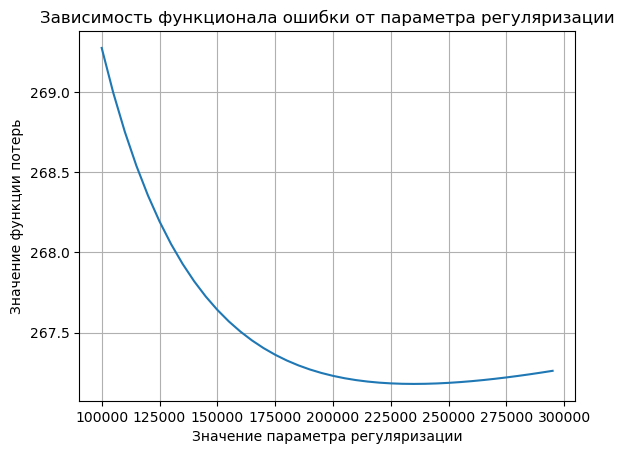

In [51]:
#Подберём оптимальное значение параметра регуляризации
ridge.choose_t(X_val,y_train,y_val,100000,300000,5000)

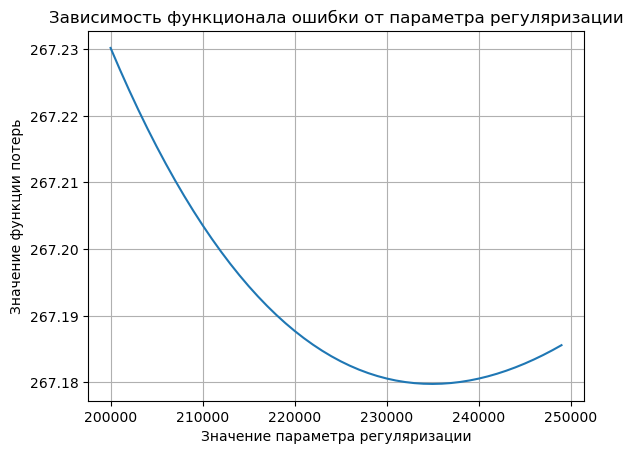

In [153]:
ridge.choose_t(X_val,y_train,y_val,200000,250000,1000)

In [145]:
#Пересчёт весов с оптимальным параметром регуляризации
ridge.fit_just_weights(y_train,t=234900)

In [147]:
ridge.W

array([ 0.2172268 ,  0.76261939,  0.36997914, -0.10546589,  0.00388794])

In [149]:
print('R^2 на тренировочной выборке:', r2_score(y_train,ridge.predict(X_train)))
print('R^2 на валидационной выборке:', r2_score(y_val,ridge.predict(X_val)))
print('R^2 на тестовой выборке:', r2_score(y_test,ridge.predict(X_test)))

R^2 на тренировочной выборке: 0.8063324838630799
R^2 на валидационной выборке: 0.8039577956975408
R^2 на тестовой выборке: 0.8082057933874722


In [151]:
#Обучение со свободным членом
ridge_2=RidgeRegressor(fit_intercept=True)

In [89]:
#Обучение без параметра регуляризации
ridge_2.fit(X_train,y_train)

In [90]:
print('R^2 на тренировочной выборке:', r2_score(y_train,ridge_2.predict(X_train)))
print('R^2 на валидационной выборке:', r2_score(y_val,ridge_2.predict(X_val)))
print('R^2 на тестовой выборке:', r2_score(y_test,ridge_2.predict(X_test)))

R^2 на тренировочной выборке: 0.9885693520217931
R^2 на валидационной выборке: 0.989172502195797
R^2 на тестовой выборке: 0.9891482053846813


In [111]:
ridge_2.cond_number() #Вычисление числа обусловленности матрицы

204307.84929145107

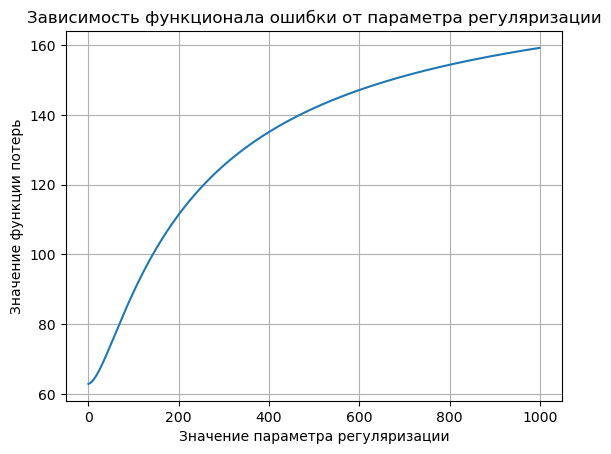

In [95]:
#Подберём оптимальное значение параметра регуляризации
ridge_2.choose_t(X_val,y_train,y_val,0,1000,1)

В данном случае регрессия не нуждается в регуляризации

# Сравнение с эталонным решением

In [118]:
from sklearn.linear_model import Ridge 

In [132]:
ridge_etalon=Ridge(alpha=0)

In [134]:
ridge_etalon.fit(X_train,y_train)
print('R^2 на тренировочной выборке:', r2_score(y_train,ridge_etalon.predict(X_train)))
print('R^2 на тестовой выборке:', r2_score(y_test,ridge_etalon.predict(X_test)))

R^2 на тренировочной выборке: 0.9885693520217931
R^2 на тестовой выборке: 0.9891482053846817


Результаты абсолютно идентичны